### Machine learning is a subfield of artificial intelligence (AI) focused on building systems that ***learn from data***.
#### Unlike traditional algorithms, machine learning ***enables computers to improve at tasks with experience(과거의 데이터로 부터 미래 데이터를 추측)***
- Here's a basic example using Python's scikit-learn library to demonstrate machine learning with a simple linear regression model.

### **일반적인 회귀분석(직선식)**
<img src='https://i.stack.imgur.com/MKVCl.png'>

LinearRegression()

Model's prediction for [0] is [3.90151793]
Model's prediction for [2] is [9.93632897]


Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

Model's slope (weight): [3.01740552]
Model's intercept (bias): [3.90151793]


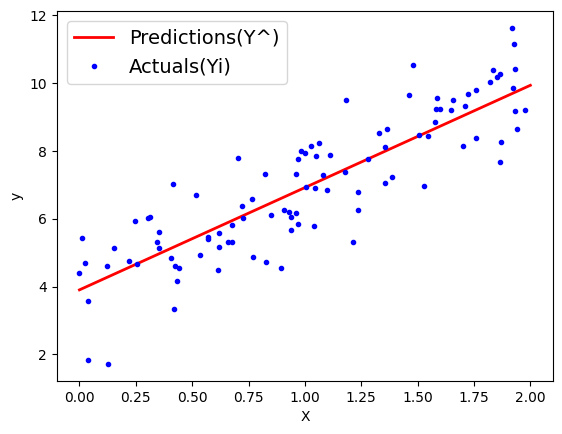

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data for a simple linear relationship: y = 2x + 3
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)
print(f"Model's prediction for {X_new[0]} is {y_predict[0]}")
print(f"Model's prediction for {X_new[1]} is {y_predict[1]}")

# Plotting the model's predictions
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions(Y^)")
plt.plot(X, y, "b.",  label="Actuals(Yi)")
plt.xlabel("X"); plt.ylabel("y")
plt.legend()

# Displaying the model's coefficients
print("Model's slope (weight):", model.coef_[0])
print("Model's intercept (bias):", model.intercept_)

### **생각할 점**

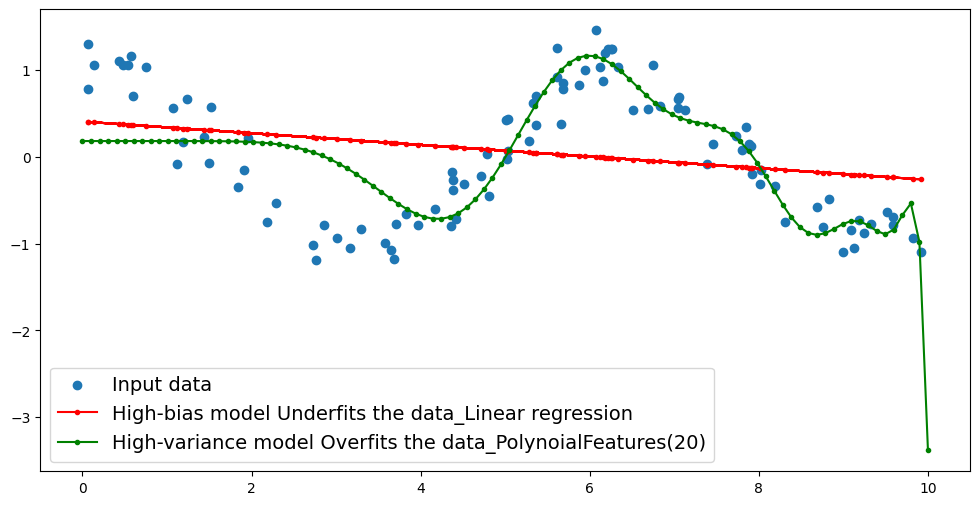

In [38]:
# 파이프라인
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate Data
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); X.shape
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); X.shape # X = X[:,np.newaxis]

y_predict = LinearRegression().fit(X,y).predict(X)
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X, y)
Xfit = np.linspace(0, 10, 100)
yfit = poly_model.predict(Xfit[:,np.newaxis])

plt.figure(figsize=(12, 6));  plt.rc('legend', fontsize=14)
plt.scatter(X, y, label='Input data'); plt.legend()
plt.plot(X, y_predict, 'r.-', label='High-bias model Underfits the data_Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='High-variance model Overfits the data_PolynoialFeatures(20)'); plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+01, tolerance: 5.723e-03
  model = cd_fast.enet_coordinate_descent(


(-4.0, 4.0)

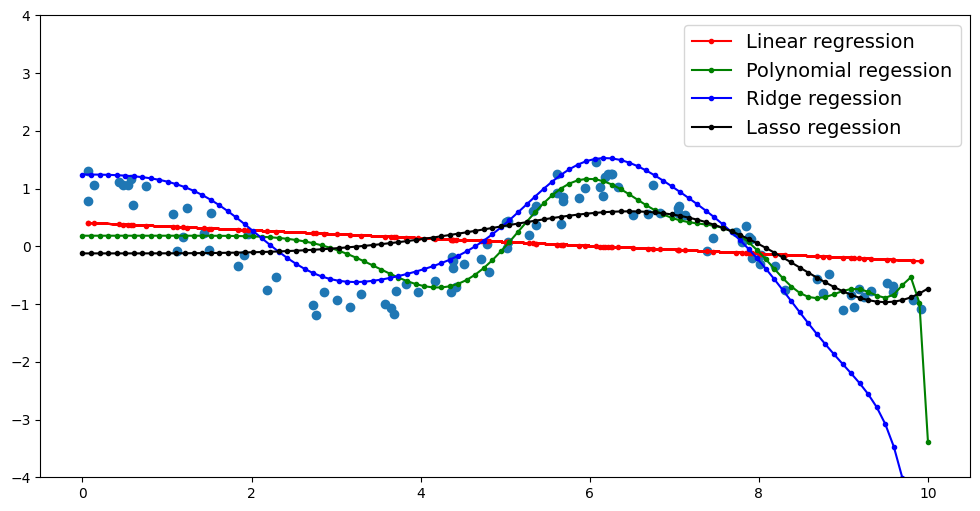

In [39]:
from sklearn.linear_model import Ridge, Lasso

lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

plt.figure(figsize=(12, 6)); plt.rc('legend', fontsize=14)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

### **데이터에 대한 교차 검증과 함께 RandomizedSearchCV를 사용하여 하이퍼파라미터 튜닝을 수행하는 과정은 여러 단계로 나누며 PolynomialFeatures의 차수와 Lasso 및 Ridge의 정규화 강도를 튜닝하는 예시를 위해 scikit-learn의 RandomizedSearchCV와 Pipeline 구조를 활용**

In [80]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# 데이터 생성
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100, 1)
y = np.cos(X).ravel() + 0.25 * rng.randn(100)

# 파이프라인 생성
linear_pipe = make_pipeline(PolynomialFeatures(), LinearRegression())
lasso_pipe = make_pipeline(PolynomialFeatures(), Lasso(max_iter=10000))
ridge_pipe = make_pipeline(PolynomialFeatures(), Ridge())

# 하이퍼파라미터 공간 정의
param_dist = {
    'polynomialfeatures__degree': sp_randint(1, 21),
    'lasso__alpha': uniform(0.1, 20),
    'ridge__alpha': uniform(0.1, 20)
}

# 모델 별 RandomizedSearchCV 설정
models = {
    'Linear': linear_pipe,
    'Lasso': lasso_pipe,
    'Ridge': ridge_pipe
}

for name, pipeline in models.items():
    # 'Lasso'와 'Ridge'에 대해서만 alpha 파라미터를 사용
    if name in ['Lasso', 'Ridge']:
        param_dist_specific = {k.replace('lasso', name.lower()): v for k, v in param_dist.items() if k.startswith('lasso') or k.startswith('polynomialfeatures')}
    else: # LinearRegression에 대해서는 degree만 사용
        param_dist_specific = {k: v for k, v in param_dist.items() if k.startswith('polynomialfeatures')}

    # RandomizedSearchCV 설정
    randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_dist_specific,
                                           n_iter=100,
                                           cv=5,
                                           scoring='neg_mean_squared_error',
                                           verbose=1)

    # 모델 학습
    randomized_search.fit(X, y)

    # 결과 출력
    print(f"{name} 최적 파라미터: {randomized_search.best_params_}")
    print(f"{name} 최적 점수: {randomized_search.best_score_}")
    print('*'*100)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('linearregression',
                                              LinearRegression())]),
                   n_iter=100,
                   param_distributions={'polynomialfeatures__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2529a45240>},
                   scoring='neg_mean_squared_error', verbose=1)

Linear 최적 파라미터: {'polynomialfeatures__degree': 16}
Linear 최적 점수: -0.062489595982836633
****************************************************************************************************
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('lasso', Lasso(max_iter=10000))]),
                   n_iter=100,
                   param_distributions={'lasso__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f252999b220>,
                                        'polynomialfeatures__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2529a45240>},
                   scoring='neg_mean_squared_error', verbose=1)

Lasso 최적 파라미터: {'lasso__alpha': 0.21916971943276567, 'polynomialfeatures__degree': 16}
Lasso 최적 점수: -0.14781534466385754
****************************************************************************************************
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('ridge', Ridge())]),
                   n_iter=100,
                   param_distributions={'polynomialfeatures__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2529a45240>,
                                        'ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f252999b220>},
                   scoring='neg_mean_squared_error', verbose=1)

Ridge 최적 파라미터: {'polynomialfeatures__degree': 8, 'ridge__alpha': 7.195075194541018}
Ridge 최적 점수: -0.06042509490504459
****************************************************************************************************


### 평균 제곱 오차(Mean Squared Error, MSE)는 실제 값과 예측 값의 차이를 제곱하여 평균낸 것으로, 이 값이 작을수록 모델의 성능이 좋다고 평가

# **1. Sampling에 대하여**

In [81]:
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [82]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [83]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

y_train

((90, 4), (90,))

((60, 4), (60,))

array([1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [85]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

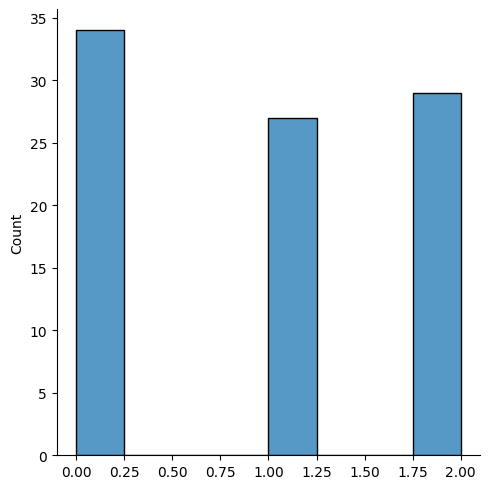

In [86]:
import seaborn as sns
g = sns.displot(y_train)

>> **⏰원래 과거 데이터의 label 0,1,2의 분포가 1/3로 균등(uniformly distributed)하였기 때문에 학습용 검증데이터의 분포도 label별로 균등분포를 갖게하고 학습을 하여야 함**

>> **층화추출(Stratify), stratify = y**

>> **X 데이터를 어떻게 추출한 것인지는 discuss later**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4,
    stratify = y,
    random_state=0)

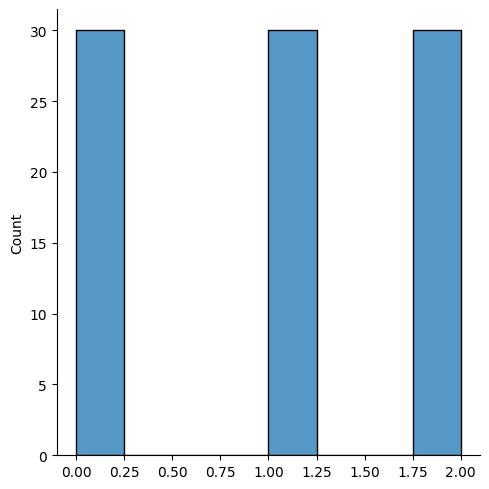

In [88]:
g = sns.displot(y_train)

In [89]:
# 훈련데이터로 학습한 모델 clf(classification)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# 검증데이터fh 정확도(Accuracy) 확인
clf.score(X_test, y_test)

1.0

### random_state를 무작위로 100번 추출하여 확인

In [90]:
def split_evaluation(X, y, i):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.7,
        stratify = y,
        random_state=i)

    # 훈련데이터로 학습한 모델 clf(classification)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

    # 검증데이터fh 정확도(Accuracy) 확인
    return clf.score(X_test, y_test)

In [92]:
from random import randint

# Generating random indices between 0 and 100
random_indices = [randint(0, 100) for _ in range(10)]

# Evaluating the model on these random splits
[split_evaluation(X, y, i) for i in random_indices]

[0.9428571428571428,
 0.9714285714285714,
 0.9714285714285714,
 0.9428571428571428,
 0.9809523809523809,
 0.9809523809523809,
 0.9523809523809523,
 0.9714285714285714,
 0.9619047619047619,
 0.9714285714285714]

### **<font color = 'blue'> Quiz 1. Test size를 변화시켜 정확도의 결과가 어떻게 되는지 확인하고 그 의미를 이야기 하라**

### 데이터가 충분히 크다면(?) 훈련데이터를 가장 효율적이고 효과적으로 활용하는 방법이 바로 Cross-Validation(교차검증) 방법이다.

<img src = 'https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

In [93]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [94]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [95]:
from sklearn import metrics
scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [96]:
scores = cross_val_score(
    clf, X, y, cv=5, scoring='recall_macro')
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### **<font color = 'blue'> Quiz 2. refit이란 무엇인가?**

In [97]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

In [98]:
import numpy as np
from sklearn.model_selection import KFold

X = np.arange(10)
kf = KFold(n_splits=5, shuffle=True, random_state=0)  # Adjusting the constructor call

# Example: Using KFold
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 3 4 5 6 7 9] TEST: [2 8]
TRAIN: [0 1 2 3 5 6 7 8] TEST: [4 9]
TRAIN: [0 2 3 4 5 7 8 9] TEST: [1 6]
TRAIN: [0 1 2 4 5 6 8 9] TEST: [3 7]
TRAIN: [1 2 3 4 6 7 8 9] TEST: [0 5]


In [99]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [9 1 6 7 3 0 5] TEST: [2 8 4]
TRAIN: [2 9 8 0 6 7 4] TEST: [3 5 1]
TRAIN: [4 5 1 0 6 9 7] TEST: [2 3 8]
TRAIN: [2 7 5 8 0 3 4] TEST: [6 1 9]
TRAIN: [4 1 0 6 8 9 3] TEST: [5 2 7]


# **2. [scikit-learn.org/getting_started:](https://scikit-learn.org/stable/getting_started.html)**

## **2.1 Fitting and predicting: estimator basics**

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1,  2,  3],  # 2 samples, 3 features
     [11, 12, 13]]

y = [0, 1]  # classes of each sample
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [101]:
import pandas as pd
pd.DataFrame(X)

,0,1,2
0,1,2,3
1,11,12,13


In [102]:
clf.predict(X)  # predict classes of the training data
clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data

array([0, 1])

array([0, 1])

## **2.2 Transformers and pre-processors**

## **2.3. Pipelines: chaining pre-processors and estimators**

## **2.4. Model evaluation**

In [103]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Adding noise to the regression problem
# X and y now contain the features and targets of a regression problem with added Gaussian noise.
X, y = make_regression(n_samples=1000, n_features=100, noise=50.0, random_state=0)

lr = LinearRegression()

result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result

{'fit_time': array([0.02541614, 0.02045131, 0.02071977, 0.02151489, 0.0209403 ]),
 'score_time': array([0.00099158, 0.00095534, 0.001091  , 0.00109172, 0.00165629]),
 'test_score': array([0.90468242, 0.8604173 , 0.89786489, 0.9145173 , 0.89278255])}

In [104]:
result['test_score']  # r_squared score is high because dataset is easy

array([0.90468242, 0.8604173 , 0.89786489, 0.9145173 , 0.89278255])

In [105]:
pd.DataFrame(result)

,fit_time,score_time,test_score
0,0.025416,0.000992,0.904682
1,0.020451,0.000955,0.860417
2,0.020720,0.001091,0.897865
3,0.021515,0.001092,0.914517
4,0.020940,0.001656,0.892783


In [108]:
from sklearn.linear_model import Ridge  # For demonstration purposes

# Define the model (using Ridge for demonstration purposes)
model = Ridge()

# Define the hyperparameters search space
param_distributions = {
    'alpha': uniform(0.1, 10)
}

# Define RandomizedSearchCV object
random_search = RandomizedSearchCV(model,
                                   param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose = 1,
                                   random_state=0)

# Fit the model
random_search.fit(X, y)

# Print the results
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f25211980a0>},
                   random_state=0, verbose=1)

Best parameters: {'alpha': 9.983738380592262}
Best score: 0.5531321317000402


<img src = 'https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/62/0b/skill-up-ridge-regression-equation-5.component.complex-narrative-xl.ts=1710174198915.png/content/adobe-cms/us/en/topics/ridge-regression/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative_138531277/items/content_group_129241463/image'>

## **2.5. Automatic parameter searches**

<img src = 'https://miro.medium.com/v2/format:webp/1*ZTlQm_WRcrNqL-nLnx6GJA.png'>

In [106]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 10),
                       'max_depth': randint(5, 20)}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            verbose=1,
                            random_state=0)

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_estimator_)

# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f25219c7760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f252ad243d0>},
                   random_state=0, verbose=1)

{'max_depth': 17, 'n_estimators': 6}
RandomForestRegressor(max_depth=17, n_estimators=6, random_state=0)


0.766190378380278

### **<font color = 'blue'> Quiz 3. Fitting 5 folds for each of 5 candidates, totalling 25 fits 그 의미를 이야기 하라**

In [ ]:
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=10,
                            param_distributions=param_distributions,
                            cv=10,  # Number of folds in cross-validation
                            verbose=1,
                            random_state=0)

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_estimator_)
search.score(X_test, y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'max_depth': 12, 'n_estimators': 9}
RandomForestRegressor(max_depth=12, n_estimators=9, random_state=0)


0.7661427823631044

- **클릭하라 [Hyperparameter with cross validation](https://github.com/ancestor9/AI-with-python/blob/main/seminar_note_1_0_getting%20started.ipynb)**

>> **Refit의 의미를 이해하라**

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv?raw=True'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from pandas import DataFrame
import math

def select_number_columns(df: DataFrame) -> DataFrame:
    return df[['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived']]


def fill_missing_values_with_median(df: DataFrame) -> DataFrame:
    for col in df.columns:
        values = sorted(df[col].dropna().tolist())
        median_age = values[math.floor(len(values) / 2)]
        df[[col]] = df[[col]].fillna(median_age)
    return df

In [ ]:
tf = select_number_columns(df)
sf = fill_missing_values_with_median(tf)

<ipython-input-30-c94becf63ad0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[col]] = df[[col]].fillna(median_age)
<ipython-input-30-c94becf63ad0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[col]] = df[[col]].fillna(median_age)
<ipython-input-30-c94becf63ad0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
X = sf.drop(columns =['Survived'])
y = sf['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Hyperparameters to test
neighbors = [3, 5, 7, 9]
distances = ['l1', 'l2']

# Track best hyperparameters and their performance
best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

for n in neighbors:
    for d in distances:
        # Initialize and train the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, y_pred)

        print(f'n_neighbors: {n}, metric: {d}, Accuracy: {accuracy}')

        # Update best hyperparameters if current configuration is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n
            best_params['metric'] = d

print(f'Best hyperparameters: {best_params}, Best Accuracy: {best_accuracy}')

n_neighbors: 3, metric: l1, Accuracy: 0.6995515695067265
n_neighbors: 3, metric: l2, Accuracy: 0.6681614349775785
n_neighbors: 5, metric: l1, Accuracy: 0.695067264573991
n_neighbors: 5, metric: l2, Accuracy: 0.7443946188340808
n_neighbors: 7, metric: l1, Accuracy: 0.7219730941704036
n_neighbors: 7, metric: l2, Accuracy: 0.7130044843049327
n_neighbors: 9, metric: l1, Accuracy: 0.726457399103139
n_neighbors: 9, metric: l2, Accuracy: 0.7085201793721974
Best hyperparameters: {'n_neighbors': 5, 'metric': 'l2'}, Best Accuracy: 0.7443946188340808


In [ ]:
# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'n_neighbors': randint(1, 30),  # Randomly choose the number of neighbors between 1 and 30
    'weights': ['uniform', 'distance'],  # Method used to weight the neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': randint(10, 50),  # Leaf size passed to BallTree or KDTree
    'p': randint(1, 3)  # Power parameter for the Minkowski metric
}

model = KNeighborsClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(model,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring='accuracy',
                                   cv=5,
                                   random_state=42,
                                   verbose=1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 34, 'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
Best Score: 0.6901582313993939
Test Set Accuracy: 0.7802690582959642


In [ ]:
! pip install pycaret

In [ ]:
from pycaret.classification import *
s = setup(sf, target = 'Survived')

,Description,Value
0,Session id,7555
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 6)"
4,Transformed data shape,"(891, 6)"
5,Transformed train set shape,"(623, 6)"
6,Transformed test set shape,"(268, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
knn = create_model('knn', fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6480,0.6610,0.5208,0.5435,0.5319,0.2501,0.2502
1,0.5680,0.5760,0.4167,0.4348,0.4255,0.0796,0.0797
2,0.6960,0.6982,0.5625,0.6136,0.5870,0.3472,0.3480
3,0.6935,0.7346,0.5833,0.6087,0.5957,0.3492,0.3494
4,0.7016,0.7021,0.6170,0.6042,0.6105,0.3687,0.3688
Mean,0.6614,0.6744,0.5401,0.5610,0.5501,0.2790,0.2792
Std,0.0505,0.0544,0.0691,0.0680,0.0677,0.1079,0.1080


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
best_knn = tune_model(knn, fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6960,0.7223,0.5000,0.6316,0.5581,0.3312,0.3364
1,0.5840,0.6188,0.2708,0.4333,0.3333,0.0539,0.0570
2,0.7040,0.6562,0.4167,0.6897,0.5195,0.3239,0.3454
3,0.7339,0.7773,0.5625,0.6923,0.6207,0.4191,0.4244
4,0.6613,0.7132,0.4043,0.5758,0.4750,0.2361,0.2442
Mean,0.6758,0.6976,0.4309,0.6045,0.5013,0.2728,0.2815
Std,0.0514,0.0550,0.0986,0.0957,0.0967,0.1239,0.1260


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

In [ ]:
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 26,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
best_knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
best_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 34,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 18,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(best_knn, X_train, y_train, cv =5)


{'fit_time': array([0.00964975, 0.00645041, 0.00591016, 0.00628853, 0.00662661]),
 'score_time': array([0.03223181, 0.0335772 , 0.03659296, 0.03374648, 0.03296161]),
 'test_score': array([0.61940299, 0.65671642, 0.71641791, 0.68421053, 0.66165414])}

In [ ]:
cross_validate(best_knn, X_train, y_train, cv =5)['test_score']

array([0.61940299, 0.65671642, 0.71641791, 0.68421053, 0.66165414])

In [ ]:
cross_validate(best_model, X_train, y_train, cv =5)['test_score']

array([0.64179104, 0.68656716, 0.71641791, 0.71428571, 0.69172932])

In [ ]:
# 파라미터를 사전형 자료로 저장하여 디폴드 모델의 파라미터로 변경한다
best_params = best_model.get_params()
best_params

{'algorithm': 'auto',
 'leaf_size': 34,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 18,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
my_new_clone_model= KNeighborsClassifier().set_params(**tuned_params)

In [ ]:
my_new_clone_model

KNeighborsClassifier(algorithm='auto', leaf_size=34, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=1,
                     weights='uniform')